In [1]:
from pylab import *

In [54]:
def malla_cuad_circ(x,y,r=0.5,V0=1):
    Nx , Ny = len(x) , len(y) # i,j
    malla = zeros((Nx,Ny))
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if sqrt( x[i]**2 + y[j]**2) < r:
                malla[i,j] = 1
            else:
                malla[i,j] = V0*rand()
    return malla

def Relajar(V,V0=1):
    Nx , Ny = V.shape
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if V[i,j] != 1:
                V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
    return V

def Met_jacob(V,V0=1,error=1e-4):
    D_max = [] # Esta variable no es necesario, solo para ver la convergencia
    diferencia , contador = 1 , 0
    while diferencia > error:
        V_old = copy(V)
        V = Relajar(V)
        diferencia = abs(V-V_old).max()
        contador +=1
        D_max.append(diferencia)
    print('Iteraciones: ',contador)
    return V , D_max

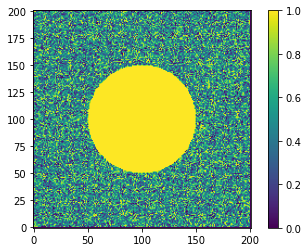

In [55]:
delta = 0.01
x = arange(-1,1+delta,delta)
y = arange(-1,1+delta,delta)
XX , YY = meshgrid(x,y)
V = malla_cuad_circ(x,y)
imshow(V.transpose(),origin='lower')
gca().set_aspect('equal')
colorbar()
show()

In [56]:
V , D_max = Met_jacob(V)

Iteraciones:  1022


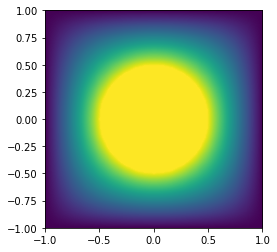

In [57]:
imshow(V.transpose(),extent=[x[0],x[-1],y[0],y[-1]],origin='lower',zorder=0)
gca().set_aspect('equal')
show()

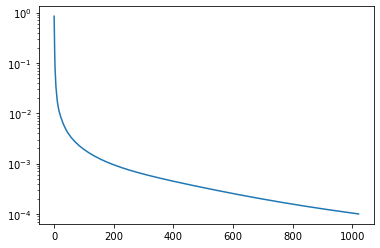

In [58]:
semilogy(D_max)
show()